# Exploratory analysis 1

In [1]:
#Exercise 1.1: What is the mean age per occupation?
import pandas as pd
df_occupations = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|')
print(df_occupations)
df_occupations_averageage= df_occupations.groupby("occupation").mean()
df_occupations_averageage=df_occupations_averageage["age"]
print(df_occupations_averageage)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810

In [2]:
#Exercise 1.2:What is the male ratio per occupation, sort it from the most to the least. Do the same for women

df_occupations_male=df_occupations[df_occupations["gender"]=="M"]
df_occupations_female=df_occupations[df_occupations["gender"]=="F"]

print(df_occupations_male["occupation"].value_counts(normalize=True))
print(df_occupations_female["occupation"].value_counts(normalize=True))

student          0.202985
educator         0.102985
other            0.102985
engineer         0.097015
programmer       0.089552
administrator    0.064179
executive        0.043284
scientist        0.041791
writer           0.038806
technician       0.038806
librarian        0.032836
entertainment    0.023881
marketing        0.023881
artist           0.022388
retired          0.019403
lawyer           0.014925
salesman         0.013433
doctor           0.010448
none             0.007463
healthcare       0.007463
homemaker        0.001493
Name: occupation, dtype: float64
student          0.219780
administrator    0.131868
other            0.131868
librarian        0.106227
educator         0.095238
writer           0.069597
artist           0.047619
healthcare       0.040293
marketing        0.036630
programmer       0.021978
homemaker        0.021978
none             0.014652
executive        0.010989
scientist        0.010989
salesman         0.010989
engineer         0.007326
lawye

In [3]:
#Exercise 1.3: For each occupation, calculate the minimum and maximum ages
print(df_occupations[["occupation","age"]].groupby("occupation").min())
print(df_occupations[["occupation","age"]].groupby("occupation").max())

               age
occupation        
administrator   21
artist          19
doctor          28
educator        23
engineer        22
entertainment   15
executive       22
healthcare      22
homemaker       20
lawyer          21
librarian       23
marketing       24
none            11
other           13
programmer      20
retired         51
salesman        18
scientist       23
student          7
technician      21
writer          18
               age
occupation        
administrator   70
artist          48
doctor          64
educator        63
engineer        70
entertainment   50
executive       69
healthcare      62
homemaker       50
lawyer          53
librarian       69
marketing       55
none            55
other           64
programmer      63
retired         73
salesman        66
scientist       55
student         42
technician      55
writer          60


In [4]:
#Exercise 1.4:For each combination of occupation and gender, calculate the mean age
df_occupations_averageage_bygender=df_occupations.groupby(["occupation","gender"]).mean()
df_occupations_averageage_bygender=df_occupations_averageage_bygender["age"]
print(df_occupations_averageage_bygender)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [5]:
#Exercise 1.5:For each occupation present the percentage of women and men
#Male Ratio
df_occupations_pivot=df_occupations.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
print(df_occupations_pivot)

sums=df_occupations_pivot[['F','M']].sum(axis=1)
print(sums)

df_occupations_pivot_male=df_occupations_pivot.drop('F', axis=1)
print(df_occupations_pivot_male)


df_occupations_pivot_male['M']=df_occupations_pivot_male['M']/sums
print(df_occupations_pivot_male)

df_occupations_pivot_male.columns=['Male Ratio']

df_occupations_pivot_male.sort_values(by='Male Ratio',ascending=False)
print(df_occupations_pivot_male)

gender          F    M
occupation            
administrator  36   43
artist         13   15
doctor          0    7
educator       26   69
engineer        2   65
entertainment   2   16
executive       3   29
healthcare     11    5
homemaker       6    1
lawyer          2   10
librarian      29   22
marketing      10   16
none            4    5
other          36   69
programmer      6   60
retired         1   13
salesman        3    9
scientist       3   28
student        60  136
technician      1   26
writer         19   26
occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
dtype: int64
gender

In [6]:
#Exercise 1.5:For each occupation present the percentage of women and men
#Female Ratio

df_occupations_pivot_female=df_occupations_pivot.drop('M', axis=1)
print(df_occupations_pivot_female)


df_occupations_pivot_female['F']=df_occupations_pivot_female['F']/sums
print(df_occupations_pivot_female)

df_occupations_pivot_female.columns=['Female Ratio']

df_occupations_pivot_female.sort_values(by='Female Ratio',ascending=False)
print(df_occupations_pivot_female)

gender          F
occupation       
administrator  36
artist         13
doctor          0
educator       26
engineer        2
entertainment   2
executive       3
healthcare     11
homemaker       6
lawyer          2
librarian      29
marketing      10
none            4
other          36
programmer      6
retired         1
salesman        3
scientist       3
student        60
technician      1
writer         19
gender                F
occupation             
administrator  0.455696
artist         0.464286
doctor         0.000000
educator       0.273684
engineer       0.029851
entertainment  0.111111
executive      0.093750
healthcare     0.687500
homemaker      0.857143
lawyer         0.166667
librarian      0.568627
marketing      0.384615
none           0.444444
other          0.342857
programmer     0.090909
retired        0.071429
salesman       0.250000
scientist      0.096774
student        0.306122
technician     0.037037
writer         0.422222
               Female Ratio
occupa

# Exploratory analysis 2

In [7]:
#Exercise 2.1+2.2+2.3+2.4: Import this dataset + What is the type of the columns?
# + Convert the type of the column Year to datetime64 + Set the Year column as the index of the dataframe
df_criminality = pd.read_csv("https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv",sep=',',parse_dates=['Year'])
print(df_criminality.head(5))
print(df_criminality.info())
df_criminality=df_criminality.set_index("Year")
print(df_criminality.head(5))
print(df_criminality.info())

        Year  Population    Total  Violent  Property  Murder  Forcible_Rape  \
0 1960-01-01   179323175  3384200   288460   3095700    9110          17190   
1 1961-01-01   182992000  3488000   289390   3198600    8740          17220   
2 1962-01-01   185771000  3752200   301510   3450700    8530          17550   
3 1963-01-01   188483000  4109500   316970   3792500    8640          17650   
4 1964-01-01   191141000  4564600   364220   4200400    9360          21420   

   Robbery  Aggravated_assault  Burglary  Larceny_Theft  Vehicle_Theft  
0   107840              154320    912100        1855400         328200  
1   106670              156760    949600        1913000         336000  
2   110860              164570    994300        2089600         366800  
3   116470              174210   1086400        2297800         408300  
4   130390              203050   1213200        2514400         472800  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (tot

In [8]:
#Exercise 2.5: Delete the Total column
df_criminality_withouttotal= df_criminality.drop(['Total'], axis=1)
print(df_criminality_withouttotal)

            Population  Violent  Property  Murder  Forcible_Rape  Robbery  \
Year                                                                        
1960-01-01   179323175   288460   3095700    9110          17190   107840   
1961-01-01   182992000   289390   3198600    8740          17220   106670   
1962-01-01   185771000   301510   3450700    8530          17550   110860   
1963-01-01   188483000   316970   3792500    8640          17650   116470   
1964-01-01   191141000   364220   4200400    9360          21420   130390   
1965-01-01   193526000   387390   4352000    9960          23410   138690   
1966-01-01   195576000   430180   4793300   11040          25820   157990   
1967-01-01   197457000   499930   5403500   12240          27620   202910   
1968-01-01   199399000   595010   6125200   13800          31670   262840   
1969-01-01   201385000   661870   6749000   14760          37170   298850   
1970-01-01   203235298   738820   7359200   16000          37990   349860   

In [9]:
#Exercise 2.6: Group the year by decades and sum the values (take care with population values)
df_criminality_decades=df_criminality.drop(["Population"],axis=1)
df_criminality_decades= df_criminality_decades.groupby((df_criminality.index.year//10)*10).sum()
print(df_criminality_decades)

          Total   Violent   Property  Murder  Forcible_Rape  Robbery  \
Year                                                                   
1960   49295900   4134930   45160900  106180         236720  1633510   
1970  100991600   9607930   91383800  192230         554570  4159020   
1980  131123369  14074328  117048900  206439         865639  5383109   
1990  136582146  17527048  119053499  211664         998827  5748930   
2000  115012044  13968056  100944369  163068         922499  4230366   
2010   50167967   6072017   44095950   72867         421059  1749809   

      Aggravated_assault  Burglary  Larceny_Theft  Vehicle_Theft  
Year                                                              
1960             2158520  13321100       26547700        5292100  
1970             4702120  28486000       53157800        9739900  
1980             7619130  33073494       72040253       11935411  
1990            10568963  26750015       77679366       14624418  
2000             8652

In [10]:
#Exercise 2.7: What is the most dangerous decade to live in the US?
df_criminality["Tot number of crimes/Pop"]=df_criminality["Total"]/df_criminality["Population"]
print(df_criminality)
df_criminality_dangerousdecade= df_criminality["Tot number of crimes/Pop"].groupby((df_criminality.index.year//10)*10).mean()
print(df_criminality_dangerousdecade)
print("The most dangerous decade have been the 80's because they have the highest average ratio of crimes per population")

            Population     Total  Violent  Property  Murder  Forcible_Rape  \
Year                                                                         
1960-01-01   179323175   3384200   288460   3095700    9110          17190   
1961-01-01   182992000   3488000   289390   3198600    8740          17220   
1962-01-01   185771000   3752200   301510   3450700    8530          17550   
1963-01-01   188483000   4109500   316970   3792500    8640          17650   
1964-01-01   191141000   4564600   364220   4200400    9360          21420   
1965-01-01   193526000   4739400   387390   4352000    9960          23410   
1966-01-01   195576000   5223500   430180   4793300   11040          25820   
1967-01-01   197457000   5903400   499930   5403500   12240          27620   
1968-01-01   199399000   6720200   595010   6125200   13800          31670   
1969-01-01   201385000   7410900   661870   6749000   14760          37170   
1970-01-01   203235298   8098000   738820   7359200   16000     

# Exploratory analysis 3

In [11]:
#Exercise 3.1: Load it in Pandas
restaurant=pd.read_csv('https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/tips.csv')

In [12]:
#Exercise 3.2: Save the DataFrame as SQLite
import sqlite3
cnx = sqlite3.connect('restaurant.db')
c=cnx.cursor()

In [13]:
#Exercise 3.3: Who is most likely to receive a tip during weekday? A Female or a Male?
#And during weekends? (Reply the following questions by slicing the SQLite database with SQL queries and then using
#Pandas for analysis)
restaurant_weekday = pd.read_sql_query("SELECT day, sex, COUNT(sex) FROM restaurant WHERE day NOT IN ('Sat', 'Sun') GROUP BY sex;", cnx)
print(restaurant_weekday)

restaurant_weekend = pd.read_sql_query("SELECT day, sex, COUNT(sex) FROM restaurant WHERE day IN ('Sat', 'Sun') GROUP BY sex;", cnx)
print(restaurant_weekend)

    day     sex  COUNT(sex)
0  Thur  Female          41
1  Thur    Male          40
   day     sex  COUNT(sex)
0  Sun  Female          46
1  Sun    Male         117


In [14]:
#Exercise 3.4: What is the table size that is most likely to bring a better tip?
#(Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis)
restaurant_size_tips = pd.read_sql_query("SELECT size, AVG(tip) AS average_tip FROM restaurant GROUP BY size;", cnx)
restaurant_size_tips

,size,average_tip
0,1,1.437500
1,2,2.582308
2,3,3.393158
3,4,4.135405
4,5,4.028000
5,6,5.225000


In [15]:
#exercise 3.5: Who are giving more tips, smokers or non smokers?
#(Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis)
restaurant_smoker_tips = pd.read_sql_query("SELECT smoker, AVG(tip) AS average_tip FROM restaurant GROUP BY smoker;", cnx)
print(restaurant_smoker_tips)

c.close()
cnx.close()

  smoker  average_tip
0     No     2.991854
1    Yes     3.008710


# Exploratory analysis 4

In [16]:
#Exercise 4.1: Which is the country that has the least amount of active airlines?
import sqlite3
cnx = sqlite3.connect('flights.db')
c=cnx.cursor()


airlines = pd.read_sql_query("SELECT country, COUNT(active) FROM airlines WHERE active='Y' AND country IS NOT NULL GROUP BY country ORDER BY COUNT(active) ASC;", cnx)
airlines.head(61)

,country,COUNT(active)
0,S.A.,1
1,ALASKA,1
2,AVIANCA,1
3,American Samoa,1
4,Antigua and Barbuda,1
...,...,...
56,Togo,1
57,Trinidad and Tobago,1
58,Turkmenistan,1
59,Vanuatu,1


In [17]:
#Exercise 4.2: Which is the country that has more airports?
airports = pd.read_sql_query("SELECT country, COUNT(country) FROM airports GROUP BY country ORDER BY COUNT(country) DESC", cnx)
airports

,country,COUNT(country)
0,United States,1697
1,Canada,435
2,Germany,321
3,Australia,263
4,Russia,249
...,...,...
235,Benin,1
236,Barbados,1
237,Aruba,1
238,Anguilla,1


In [18]:
#Exercise 4.3: And the country with the least airports?
airports = pd.read_sql_query("SELECT country, COUNT(country) FROM airports GROUP BY country ORDER BY COUNT(country) ASC", cnx)
airports

,country,COUNT(country)
0,Albania,1
1,Anguilla,1
2,Aruba,1
3,Barbados,1
4,Benin,1
...,...,...
235,Russia,249
236,Australia,263
237,Germany,321
238,Canada,435


In [19]:
#Exercise 4.4: Which country has the most outgoing destinations? And the least?
routes = pd.read_sql_query("SELECT airlines.country, COUNT(routes.dest) FROM airlines INNER JOIN routes ON routes.airline_id = airlines.id GROUP BY country ORDER BY COUNT(routes.dest) DESC;", cnx)
routes

,country,COUNT(routes.dest)
0,United States,12785
1,China,7262
2,United Kingdom,3336
3,Germany,2942
4,Ireland,2760
...,...,...
161,Congo (Kinshasa),4
162,Benin,4
163,Albania,4
164,Kyrgyzstan,2


In [21]:
#Exercise 4.5: And which country has the most incoming destinations? And the least?
routes = pd.read_sql_query("SELECT airlines.country, COUNT(routes.source) FROM airlines INNER JOIN routes ON routes.airline_id = airlines.id GROUP BY country ORDER BY COUNT(routes.dest) DESC;", cnx)
routes

c.close()
cnx.close()

# Exploratory analysis 5

In [24]:
#Exercise 5.1: How many men and women survived?
import pandas as pd
train=pd.read_csv('train.csv')
print(train.head())
train[['Survived', 'Sex']].groupby('Sex').sum()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,Survived
Sex,
female,233
male,109


In [39]:
#Exercise 5.2: What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years
train['Age group'] = pd.cut(train.Age, [0,10,20,30,40,50,60,70,80,90,100])
print(train)
df_survival_pivot=pd.pivot_table(train[['Age group', 'Survived']], index='Age group', columns='Survived', aggfunc='size').sort_values(by=1,ascending=False)

sums=df_survival_pivot[[0,1]].sum(axis=1)
print(sums)

df_survival_pivot=df_survival_pivot.drop(0, axis=1)
print(df_survival_pivot)


df_survival_pivot[1]=df_survival_pivot[1]/sums
print(df_survival_pivot)

df_survival_pivot.columns=['Survival Percentage']

print(df_survival_pivot)
print("The age group 0-10 has the highest chance to survive")

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [40]:
#Exercise 5.3: Which port of embarkation had most of the survivors? And which less?
train[['Embarked', 'Survived']].groupby('Embarked').sum().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
S,217
C,93
Q,30


In [41]:
#Exercise 5.4: Which ticket class had most of the survivors? And which less?
print(train[['Pclass', 'Survived']].groupby('Pclass').sum().sort_values(by='Survived',ascending=False))

        Survived
Pclass          
1            136
3            119
2             87


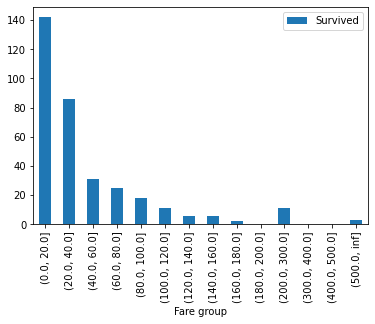

In [43]:
#Exercise 5.5: Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?
import numpy as np
titanic['Fare group']=pd.cut(titanic['Fare'], bins=[0,20, 40, 60, 80, 100, 120, 140 ,160 , 180, 200, 300, 400, 500, np.inf])
titanic[['Fare group', 'Survived']].groupby('Fare group').sum().sort_values(by='Fare group', ascending=True).plot(kind='bar')
